<a href="https://colab.research.google.com/github/cjk5642/Rainfall-Prediction-App/blob/main/src/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import sys, os
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# mount google drive
drive.mount('/content/drive', force_remount=True)

# add utils to path
collin_src_path = "/content/drive/MyDrive/Classes/Spring 2022/DSCI 590: Time Series Analysis/Final Project/src"
sys.path.append(collin_src_path)

# load the weather data
try:
  from meteostat import Daily, Point
except ModuleNotFoundError:
  !pip install meteostat
  from meteostat import Daily, Point
from utils import WeatherData
wd = WeatherData()

Mounted at /content/drive


In [ ]:
afc = wd.weather_data.loc['AFC']
afc.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Forecast office,State,Address,latitude,longitude,index
date,,,,,,,,,,,,,,,,
2018-01-01,-3.4,-7.1,1.1,0.3,80.0,0.0,6.8,0.0,995.3,0.0,Anchorage[3],Alaska,"6930 Sand Lake Rd, Anchorage, AK 99502",61.156886,-149.982278,0
2018-01-02,2.3,-1.0,6.7,0.5,80.0,143.0,27.4,0.0,996.4,0.0,Anchorage[3],Alaska,"6930 Sand Lake Rd, Anchorage, AK 99502",61.156886,-149.982278,0
2018-01-03,2.3,0.0,2.8,11.4,50.0,0.0,8.3,0.0,1007.0,0.0,Anchorage[3],Alaska,"6930 Sand Lake Rd, Anchorage, AK 99502",61.156886,-149.982278,0
2018-01-04,-0.6,-6.0,1.1,0.0,180.0,0.0,6.1,0.0,0.0,0.0,Anchorage[3],Alaska,"6930 Sand Lake Rd, Anchorage, AK 99502",61.156886,-149.982278,0
2018-01-05,-6.1,-10.5,-5.5,0.0,180.0,0.0,6.5,0.0,1001.6,0.0,Anchorage[3],Alaska,"6930 Sand Lake Rd, Anchorage, AK 99502",61.156886,-149.982278,0


predicted=1.509785, expected=4.100000
predicted=1.797076, expected=0.000000
predicted=1.297984, expected=0.000000
predicted=0.967873, expected=0.800000
predicted=1.411214, expected=0.000000
predicted=0.612889, expected=0.000000
predicted=0.821514, expected=0.000000
predicted=0.096893, expected=0.000000
predicted=0.085165, expected=0.000000
predicted=0.133942, expected=0.000000
predicted=-0.006887, expected=0.000000
predicted=-0.006881, expected=0.000000
predicted=-0.006874, expected=0.000000
predicted=-0.006867, expected=0.000000
predicted=-0.006860, expected=7.900000
predicted=2.099149, expected=0.000000
predicted=1.452571, expected=0.000000
predicted=1.037469, expected=0.000000
predicted=1.024028, expected=1.300000
predicted=1.251781, expected=0.000000
predicted=1.630216, expected=0.000000
predicted=0.164381, expected=0.000000
predicted=0.164001, expected=0.000000
predicted=0.142698, expected=0.000000
predicted=0.221513, expected=0.000000
predicted=-0.006802, expected=14.500000
predi

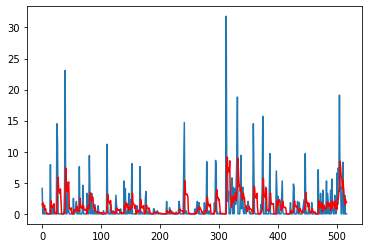

In [ ]:
# split into train and test sets
X = afc['prcp'].values
size = int(len(X) * 0.66)
train, test = X[:size], X[size:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()